

# Practical - Machine Learning Project


In this we are going to apply different machine learning models on medical cancer dataset

## Import Libraries

In [ ]:
# import Libararies

import pandas as pd
import numpy as np
from numpy import unique
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



#----- Import Tensorflow modules -----------#
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Set plotly as backend for plotting through seaborn in sns l option

pd.options.plotting.backend = "plotly"


## Data upload

In [ ]:
# Data upload


meso_data = pd.read_csv("/content/drive/MyDrive/Mesothelioma/Mesothelioma_data.csv")
meso_data.head()

,age,gender,duration of asbestos exposure,duration of symptoms,dyspnoea,ache on chest,weakness,habit of cigarette,cell count (WBC),hemoglobin (HGB),...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),diagnosis
0,47,1,20,24.0,1,1,0,2,9,1,...,289,0.0,0.00,79,1,0,0,0,34,1
1,55,1,45,1.0,1,1,1,3,7,0,...,7541,1.6,0.80,6,1,1,1,1,42,1
2,29,1,23,1.0,0,0,0,2,12,1,...,480,0.0,0.00,90,1,0,0,0,43,2
3,39,1,10,3.0,0,1,1,0,14,1,...,459,5.0,2.80,45,1,1,0,0,21,1
4,47,1,10,1.5,1,1,0,3,4,0,...,213,3.6,1.95,53,1,1,0,0,11,1


## EDA

In [ ]:
meso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    int64  
 1   gender                            324 non-null    int64  
 2   duration of asbestos exposure     324 non-null    int64  
 3   duration of symptoms              324 non-null    float64
 4   dyspnoea                          324 non-null    int64  
 5   ache on chest                     324 non-null    int64  
 6   weakness                          324 non-null    int64  
 7   habit of cigarette                324 non-null    int64  
 8   cell count (WBC)                  324 non-null    int64  
 9   hemoglobin (HGB)                  324 non-null    int64  
 10  platelet count (PLT)              324 non-null    int64  
 11  sedimentation                     324 non-null    int64  
 12  blood la

In [ ]:
meso_data.isnull().sum().plot(kind="bar")

In [ ]:
meso_data.describe().plot()

In [ ]:
print(meso_data.diagnosis.value_counts())


print("======================================================")

px.pie(meso_data, hole= 0.6, names="diagnosis", color= "diagnosis")



1    228
2     96
Name: diagnosis, dtype: int64


In [ ]:
# wide to long data frame
HD_df_long = meso_data.melt( id_vars="diagnosis")
HD_df_long.head()

,diagnosis,variable,value
0,1,age,47.0
1,1,age,55.0
2,2,age,29.0
3,1,age,39.0
4,1,age,47.0


In [ ]:
fig = px.box(HD_df_long, y= "value", color = "diagnosis", facet_col= "variable", notched= True)

fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
meso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               324 non-null    int64  
 1   gender                            324 non-null    int64  
 2   duration of asbestos exposure     324 non-null    int64  
 3   duration of symptoms              324 non-null    float64
 4   dyspnoea                          324 non-null    int64  
 5   ache on chest                     324 non-null    int64  
 6   weakness                          324 non-null    int64  
 7   habit of cigarette                324 non-null    int64  
 8   cell count (WBC)                  324 non-null    int64  
 9   hemoglobin (HGB)                  324 non-null    int64  
 10  platelet count (PLT)              324 non-null    int64  
 11  sedimentation                     324 non-null    int64  
 12  blood la

In [ ]:
px.scatter_matrix(meso_data,
                  dimensions= ["age", "duration of asbestos exposure", "duration of symptoms", "dyspnoea", "ache on chest", "weakness", "habit of cigarette", "cell count (WBC)" ],
                  color = "diagnosis")

In [ ]:
corr_data = meso_data.drop(["diagnosis"], axis=1, inplace= False)
corr_data.head()




,age,gender,duration of asbestos exposure,duration of symptoms,dyspnoea,ache on chest,weakness,habit of cigarette,cell count (WBC),hemoglobin (HGB),...,glucose,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP)
0,47,1,20,24.0,1,1,0,2,9,1,...,105,289,0.0,0.00,79,1,0,0,0,34
1,55,1,45,1.0,1,1,1,3,7,0,...,96,7541,1.6,0.80,6,1,1,1,1,42
2,29,1,23,1.0,0,0,0,2,12,1,...,93,480,0.0,0.00,90,1,0,0,0,43
3,39,1,10,3.0,0,1,1,0,14,1,...,93,459,5.0,2.80,45,1,1,0,0,21
4,47,1,10,1.5,1,1,0,3,4,0,...,83,213,3.6,1.95,53,1,1,0,0,11


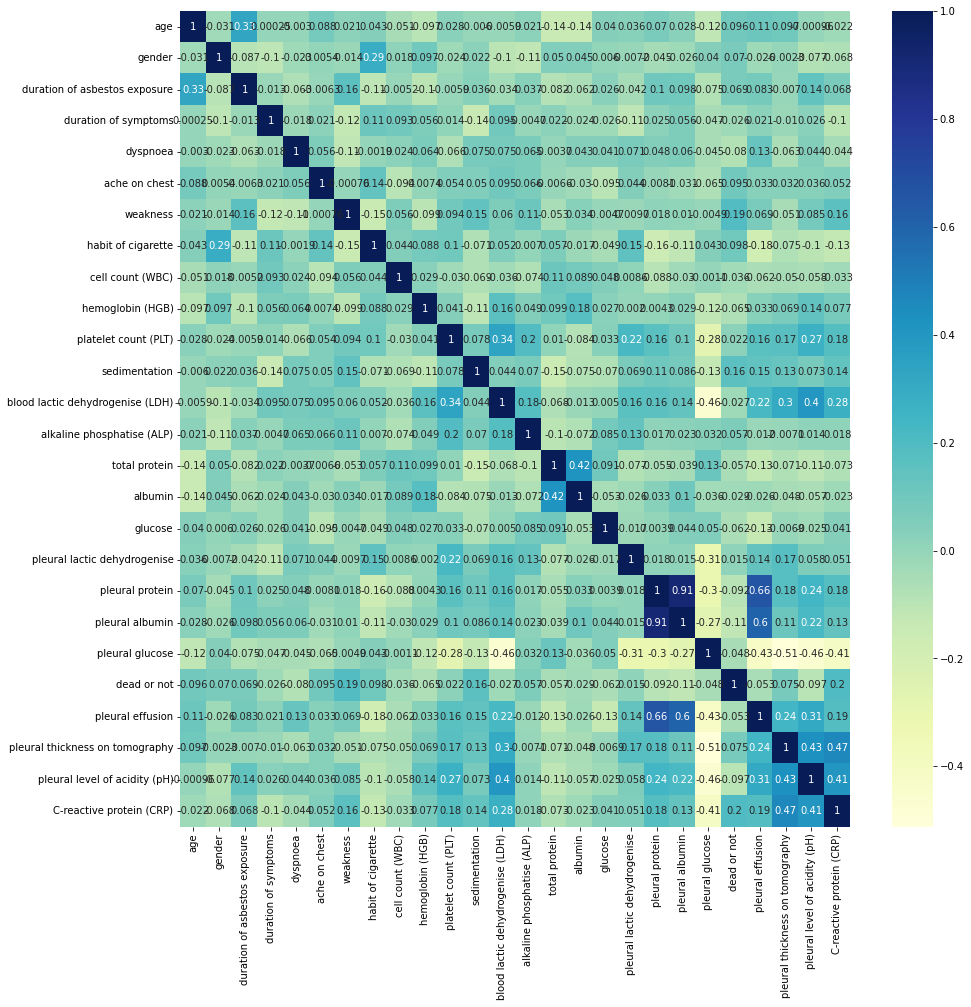

In [ ]:

corr_mat = corr_data.corr()

plt.subplots(figsize=(15,15))
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



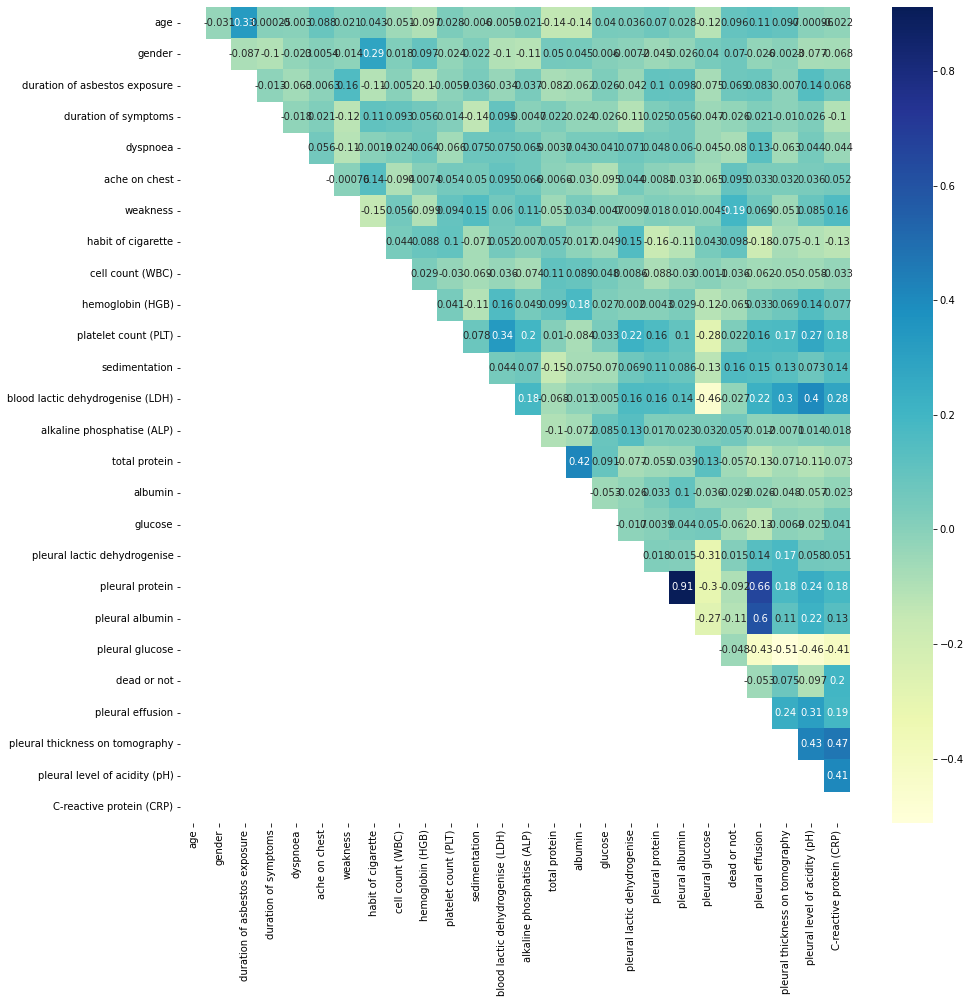

In [ ]:
upper_tri = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
plt.subplots(figsize=(15,15))
sns.heatmap(upper_tri, annot=True, cmap="YlGnBu")

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


[]


Model Building

### Split the data

In [ ]:
# Split the data

X = meso_data.iloc[:, :-1]
print(X)

print("==============================================================")

y= meso_data.iloc[:, -1]
print(y)

     age  gender  duration of asbestos exposure  duration of symptoms  \
0     47       1                             20                  24.0   
1     55       1                             45                   1.0   
2     29       1                             23                   1.0   
3     39       1                             10                   3.0   
4     47       1                             10                   1.5   
..   ...     ...                            ...                   ...   
319   75       1                             50                   9.0   
320   66       1                             41                   9.0   
321   58       1                             40                   8.0   
322   42       1                              0                   2.0   
323   54       1                             40                   3.0   

     dyspnoea  ache on chest  weakness  habit of cigarette  cell count (WBC)  \
0           1              1         0     

In [ ]:
# Scale the Data

sc = StandardScaler()
X_norm = sc.fit_transform(X)
print(X_norm.shape)

(324, 26)


In [ ]:
# Train Test valid split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.25, random_state= 8)

In [ ]:
print("Train data :", X_train)
print("Train data shape :", X_train.shape)
print("================================")

print("val data :", X_val)
print("================================")

print("test data :", X_test)
print("================================")

Train data : [[ 0.93359777  0.83979947  2.12336732 ...  0.82386678  0.95768458
   0.83139006]
 [ 0.11434676 -1.19076045  0.90345241 ...  0.82386678 -1.04418513
   0.61041354]
 [ 0.47845832 -1.19076045  1.39141837 ... -1.21378847  0.95768458
   0.52202293]
 ...
 [-1.1600437  -1.19076045  0.29349496 ... -1.21378847  0.95768458
   1.53851492]
 [ 0.29640254  0.83979947  0.23249921 ...  0.82386678  0.95768458
  -0.93642211]
 [-0.15873691  0.83979947  0.41548645 ...  0.82386678  0.95768458
   0.74299945]]
Train data shape : (243, 26)
val data : [[-0.70490425  0.83979947 -0.62144122 ... -1.21378847 -1.04418513
  -1.33417984]
 [ 0.11434676  0.83979947 -1.84135612 ... -1.21378847 -1.04418513
  -1.24578923]
 [ 0.84256988  0.83979947  0.23249921 ...  0.82386678 -1.04418513
   0.1684605 ]
 ...
 [ 0.38743043  0.83979947 -1.84135612 ...  0.82386678 -1.04418513
  -1.33417984]
 [-0.06770902  0.83979947  0.23249921 ... -1.21378847 -1.04418513
  -0.8922268 ]
 [ 0.11434676  0.83979947  0.3544907  ...  0.

## PCA

In [ ]:
# PCA to visualize data

from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
PCs = sklearn_pca.fit_transform(X_norm)
data_transform = pd.DataFrame(PCs,columns=['PC1','PC2'])
data_transform = pd.concat([data_transform,meso_data.iloc[:,-1]],axis=1)


#plot

fig, axes = plt.subplots(figsize=(10,8))
sns.set_style("whitegrid")
sns.scatterplot(x='PC1',y='PC2',data = data_transform,hue='diagnosis',s=60, cmap='grey')


## Model Building & Training

### KNN model

Text(0, 0.5, 'Error Rate')

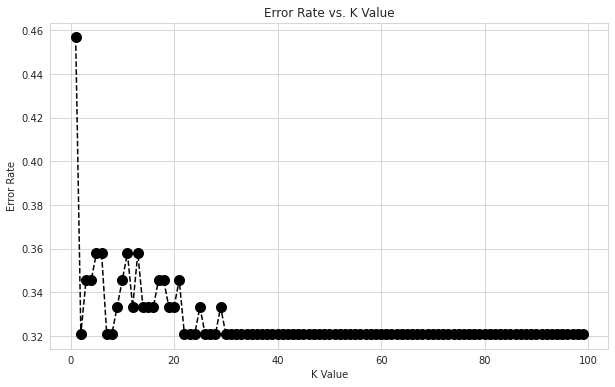

In [ ]:
# Choose n-neigbour for KNN model

from sklearn.neighbors import KNeighborsClassifier
errors = []
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_val)
  errors.append(np.mean(pred_i != y_val))
plt.figure(figsize=(10,6))
plt.plot(range(1,100),errors,color='black', linestyle='dashed',marker='o',markerfacecolor='black', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')


### Different model selection

In [ ]:
# Models

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
lr_pred = LogisticRegressionModel.fit(X_train,y_train).predict(X_val)

KNN_classifierModel = KNeighborsClassifier(n_neighbors = 30)
KNN_pred=KNN_classifierModel.fit(X_train,y_train).predict(X_val)

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
SVM_classifier = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
#SVCModel = SVC(kernel= 'rbf', max_iter=100,C=1.0,gamma='auto')
svm_pred=SVM_classifier.fit(X_train,y_train).predict(X_val)

GaussianNBModel = GaussianNB()
gnb_pred = GaussianNBModel.fit(X_train,y_train).predict(X_val)

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=33)
dt_pred = DecisionTreeClassifierModel.fit(X_train,y_train).predict(X_val)


param_grid = {'n_estimators': [10, 100,150,200,250,300,350,400]}
RandomForestClassifierModel = GridSearchCV(RandomForestClassifier(),param_grid,refit=True, verbose=0)
#RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33)
rf_pred = RandomForestClassifierModel.fit(X_train,y_train).predict(X_val)

SGDClassifierModel = SGDClassifier(penalty='l2',learning_rate='optimal',random_state=33)
SGD_pred = SGDClassifierModel.fit(X_train,y_train).predict(X_val)

GBCModel = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=33)
GBC_pred = GBCModel.fit(X_train,y_train).predict(X_val)


In [ ]:
print(X_train.shape[1])

26


### Artificial Neural Network

In [ ]:
#ANN

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from datetime import datetime




filepath="/content/drive/MyDrive/Mesothelioma/weights-improvement-{epoch:02d}-{val_loss:.12f}.hdf5"
log_dir = "/content/drive/MyDrive/Mesothelioma/"+datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,       patience=5, min_lr=0.0001)
tensorboard = TensorBoard(log_dir="./logs", histogram_freq=1, write_graph=True)

# determine the number of input features
n_features = X_train.shape[1]
print("The Number of Features (columns) : ", n_features )


# define model
ANN_model = Sequential()
ANN_model.add(Dense(26, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(26, activation='relu', kernel_initializer='he_normal'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(1, activation='sigmoid'))


ANN_model.summary()

# compile the model
ANN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5 )

# call backs

callbacks= [checkpoint, tensorboard, reduce_lr]



# Fit

history=ANN_model.fit(x=X_train, y=y_train, epochs=400, batch_size= 128,  validation_split= 0.2, verbose=0, callbacks= callbacks )

# evaluate the model
loss, acc_ANN = ANN_model.evaluate(X_val, y_val, verbose=0)
print('Test Accuracy: %.3f' % acc_ANN)

ANN_pred = ANN_model.predict(X_val)

print(ANN_pred)


ANN_model_performance = pd.DataFrame(ANN_model.history.history)

#ax.set_xlabel('Epoch')

print(ANN_model_performance.head())
ANN_model_performance.plot()


## Prediction

In [ ]:
print(lr_pred)

[2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2
 2 1 1 1 1 1 1]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
ANN_acc= history.history["accuracy"]
print(ANN_acc)

[0.5, 0.4793814420700073, 0.530927836894989, 0.5206185579299927, 0.5257731676101685, 0.5824742317199707, 0.5876288414001465, 0.5979381203651428, 0.6134020686149597, 0.5721649527549744, 0.5979381203651428, 0.5773195624351501, 0.5979381203651428, 0.592783510684967, 0.6185566782951355, 0.6340206265449524, 0.6185566782951355, 0.623711347579956, 0.6443299055099487, 0.6443299055099487, 0.6546391844749451, 0.6494845151901245, 0.6546391844749451, 0.6804123520851135, 0.6546391844749451, 0.6649484634399414, 0.6752577424049377, 0.6649484634399414, 0.6752577424049377, 0.7010309100151062, 0.6907216310501099, 0.6855670213699341, 0.6701030731201172, 0.6907216310501099, 0.6958763003349304, 0.6752577424049377, 0.6855670213699341, 0.6958763003349304, 0.6958763003349304, 0.7061855792999268, 0.7010309100151062, 0.7010309100151062, 0.7061855792999268, 0.7061855792999268, 0.7010309100151062, 0.7010309100151062, 0.6907216310501099, 0.7010309100151062, 0.7010309100151062, 0.7061855792999268, 0.711340188980102

In [ ]:
models=['Logistic Regression','KNN', 'SVM','GaussianNB','DecisionTree Classifier','RandomForest Classifier','SGD Classifier','GBCModel']
preds=[lr_pred,KNN_pred, svm_pred,gnb_pred,dt_pred,rf_pred,SGD_pred,GBC_pred,y ]
print(preds)

In [ ]:
# models2=['Logistic Regression','KNN', 'SVM','GaussianNB','DecisionTree Classifier','RandomForest Classifier','SGD Classifier','GBCModel', "ANN"]
# preds=[lr_pred,KNN_pred, svm_pred,gnb_pred,dt_pred,rf_pred,SGD_pred,GBC_pred,y ]
# print(preds)

In [ ]:
print(lr_pred)

[2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 2
 2 1 1 1 1 1 1]


In [ ]:
ANN_pred

In [ ]:
from itertools import chain
x = ANN_pred
y = list(chain(*x))
print(y)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
acc=[]
for i in preds:
    accscore=accuracy_score(i,y_val).round(2)
    acc.append(accscore)

print(acc)

In [ ]:
join = zip(models, acc)
print(join)

result = pd.DataFrame(join, columns=['model', 'accuracy']).sort_values(['accuracy'], ascending=False)

print(result)

## Plotting Results

In [ ]:
sns.barplot(x = 'model', y= 'accuracy', data= result), plt.xticks(rotation =-90)